In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import statsmodels.api as sm
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/My Drive/covid_19_india.csv");

In [ ]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
confirmed_cases= pd.DataFrame(data, columns=['Date','Confirmed'])

In [ ]:
confirmed_cases.head()

,Date,Confirmed
0,30-01-2020,1
1,31-01-2020,1
2,01-02-2020,2
3,02-02-2020,3
4,03-02-2020,3


In [ ]:
death_cases=pd.DataFrame(data,columns=['Date','Deaths'])

In [ ]:
death_cases.head()

,Date,Deaths
0,30-01-2020,0
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,0
4,03-02-2020,0


In [ ]:
cured_cases=pd.DataFrame(data, columns=['Date','Cured'])

In [ ]:
cured_cases.head()

,Date,Cured
0,30-01-2020,0
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,0
4,03-02-2020,0


In [ ]:
confirmed_cases1=confirmed_cases.groupby('Date',sort=False).sum()

In [ ]:
confirmed_cases1

,Confirmed
Date,
30-01-2020,1
31-01-2020,1
01-02-2020,2
02-02-2020,3
03-02-2020,3
...,...
12-05-2020,70756
13-05-2020,74281
14-05-2020,78003


In [ ]:
death_cases1=death_cases.groupby('Date',sort=False).sum()

In [ ]:
death_cases1

,Deaths
Date,
30-01-2020,0
31-01-2020,0
01-02-2020,0
02-02-2020,0
03-02-2020,0
...,...
12-05-2020,2293
13-05-2020,2415
14-05-2020,2549


In [ ]:
cured_cases1=cured_cases.groupby('Date',sort=False).sum()

In [ ]:
cured_cases1

,Cured
Date,
30-01-2020,0
31-01-2020,0
01-02-2020,0
02-02-2020,0
03-02-2020,0
...,...
12-05-2020,22455
13-05-2020,24386
14-05-2020,26235


In [ ]:
datewise_confirmed_cases=confirmed_cases1.transpose()

In [ ]:
datewise_cured_cases= cured_cases1.transpose()

In [ ]:
datewise_death_cases= death_cases1.transpose()

In [ ]:
datewise_confirmed_cases

Date,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,13-02-2020,14-02-2020,15-02-2020,16-02-2020,17-02-2020,18-02-2020,19-02-2020,20-02-2020,21-02-2020,22-02-2020,23-02-2020,24-02-2020,25-02-2020,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,04-03-2020,05-03-2020,06-03-2020,07-03-2020,08-03-2020,09-03-2020,...,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020,16-05-2020
Confirmed,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,6,28,30,31,34,39,46,...,4789,5274,5865,6761,7529,8447,9352,10815,11933,12759,13835,14792,16116,17656,18985,20471,21700,23452,24893,26605,28160,29834,31709,33330,34972,37157,40124,42836,46711,49391,52952,56342,59662,62939,67152,70756,74281,78003,81970,85710


In [ ]:
datewise_cured_cases

Date,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,13-02-2020,14-02-2020,15-02-2020,16-02-2020,17-02-2020,18-02-2020,19-02-2020,20-02-2020,21-02-2020,22-02-2020,23-02-2020,24-02-2020,25-02-2020,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,04-03-2020,05-03-2020,06-03-2020,07-03-2020,08-03-2020,09-03-2020,...,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020,16-05-2020
Cured,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,...,353,411,478,516,653,765,980,1190,1344,1515,1767,2015,2302,2842,3260,3960,4325,4814,5210,5914,6362,7027,7797,8373,9065,9951,10887,11762,13161,14183,15267,16540,17847,19358,20917,22455,24386,26235,27920,30153


In [ ]:
datewise_death_cases

Date,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,13-02-2020,14-02-2020,15-02-2020,16-02-2020,17-02-2020,18-02-2020,19-02-2020,20-02-2020,21-02-2020,22-02-2020,23-02-2020,24-02-2020,25-02-2020,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,04-03-2020,05-03-2020,06-03-2020,07-03-2020,08-03-2020,09-03-2020,...,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020,16-05-2020
Deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,124,149,169,206,242,273,324,353,392,420,452,488,519,559,603,652,686,723,779,826,886,937,1008,1075,1152,1218,1306,1389,1583,1694,1783,1886,1981,2109,2206,2293,2415,2549,2649,2752


In [ ]:
dates=datewise_confirmed_cases.keys()

In [ ]:
cases_conf=[]
cases_conf=datewise_confirmed_cases.to_numpy()

In [ ]:
cases_cure=[]
cases_cure=datewise_cured_cases.to_numpy()

In [ ]:
cases_death=[]
cases_death=datewise_death_cases.to_numpy()

In [ ]:
cases_conf

array([[    1,     1,     2,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     5,     6,    28,    30,
           31,    34,    39,    46,    58,    60,    74,    81,    84,
          110,   114,   137,   151,   173,   223,   283,   360,   433,
          519,   606,   694,   724,   909,  1024,  1251,  1397,  1834,
         2069,  2547,  3072,  3577,  4281,  4789,  5274,  5865,  6761,
         7529,  8447,  9352, 10815, 11933, 12759, 13835, 14792, 16116,
        17656, 18985, 20471, 21700, 23452, 24893, 26605, 28160, 29834,
        31709, 33330, 34972, 37157, 40124, 42836, 46711, 49391, 52952,
        56342, 59662, 62939, 67152, 70756, 74281, 78003, 81970, 85710]])

In [ ]:
cases_cure

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,    10,
           13,    13,    14,    14,    20,    23,    23,    24,    24,
           40,    43,    45,    67,    80,    96,   102,   124,   144,
          156,   163,   213,   275,   319,   353,   411,   478,   516,
          653,   765,   980,  1190,  1344,  1515,  1767,  2015,  2302,
         2842,  3260,  3960,  4325,  4814,  5210,  5914,  6362,  7027,
         7797,  8373,  9065,  9951, 10887, 11762, 13161, 14183, 15267,
        16540, 17847, 19358, 20917, 22455, 24386, 26235, 27920, 30153]])

In [ ]:
cases_death

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           2,    2,    2,    3,    3,    4,    4,    4,    7,    7,    9,
          10,   15,   17,   19,   27,   31,   35,   41,   53,   62,   75,
          83,  111,  124,  149,  169,  206,  242,  273,  324,  353,  392,
         420,  452,  488,  519,  559,  603,  652,  686,  723,  779,  826,
         886,  937, 1008, 1075, 1152, 1218, 1306, 1389, 1583, 1694, 1783,
        1886, 1981, 2109, 2206, 2293, 2415, 2549, 2649, 2752]])

In [ ]:
days=np.array([i for i in range(len(dates))]).reshape(-1,1)
cases_conf=np.array(cases_conf).reshape(-1,1)
cases_death=np.array(cases_death).reshape(-1,1)
cases_cure=np.array(cases_cure).reshape(-1,1)

In [ ]:
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
cases_conf

array([[    1],
       [    1],
       [    2],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    5],
       [    6],
       [   28],
       [   30],
       [   31],
       [   34],
       [   39],
       [   46],
       [   58],
       [   60],
       [   74],
       [   81],
       [   84],
       [  110],
       [  114],
       [  137],
       [  151],
       [  173],
       [  223],
       [  283],
       [  360],
       [  433],
       [  519],
       [  606],
       [  694],
       [  724],
       [  909],
       [ 1024],
       [ 1251],
       [ 1397],
       [

In [ ]:
cases_cure

array([[    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [   10],
       [   13],
       [   13],
       [   14],
       [   14],
       [   20],
       [   23],
       [   23],
       [   24],
       [   24],
       [   40],
       [   43],
       [   45],
       [   67],
       [   80],
       [   96],
       [  102],
       [  124],
       [

In [ ]:
cases_death

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   1],
       [   2],
       [   2],
       [   2],
       [   3],
       [   3],
       [   4],
       [   4],
       [   4],
       [   7],
       [   7],
       [   9],
       [  10],
       [  15],
       [  17],
       [  19],
       [  27],
       [  31],
       [  35],
       [  41],
       [  53],
       [  62],
       [  75],
       [  

In [ ]:
days_in_future=10
future_forecast=np.array([i for i in range(len(days)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
start='30-01-2020'
start_date=datetime.datetime.strptime(start,'%d-%m-%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d-%m-%Y'))

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(days,cases_conf)
test_linear_pred=linear_model.predict(days)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred,cases_conf))
print('MSE:', mean_squared_error(test_linear_pred,cases_conf))

MAE: 10939.751146039194
MSE: 185810633.77983642


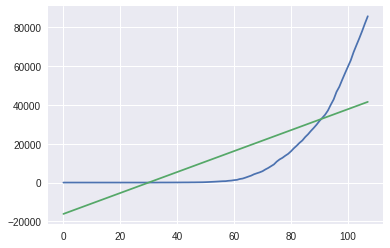

In [ ]:
plt.plot(cases_conf)
plt.plot(test_linear_pred)

In [ ]:
print('Linear regression for future prediction')
print(linear_pred[-10:])

Linear regression for future prediction
[[42123.82502596]
 [42663.44413959]
 [43203.06325321]
 [43742.68236684]
 [44282.30148047]
 [44821.92059409]
 [45361.53970772]
 [45901.15882134]
 [46440.77793497]
 [46980.3970486 ]]


In [ ]:
linear_model.fit(days,cases_cure)
test_linear_pred=linear_model.predict(days)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred,cases_cure))
print('MSE:', mean_squared_error(test_linear_pred,cases_cure))

MAE: 3730.181099921232
MSE: 23842718.03320694


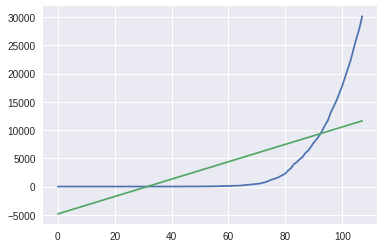

In [ ]:
plt.plot(cases_cure)
plt.plot(test_linear_pred)

In [ ]:
print('Linear regression for future prediction')
print(linear_pred[-10:])

Linear regression for future prediction
[[11783.29993077]
 [11937.26839705]
 [12091.23686333]
 [12245.20532961]
 [12399.17379589]
 [12553.14226217]
 [12707.11072845]
 [12861.07919473]
 [13015.04766101]
 [13169.01612729]]


In [ ]:
linear_model.fit(days,cases_death)
test_linear_pred=linear_model.predict(days)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred,cases_death))
print('MSE:', mean_squared_error(test_linear_pred,cases_death))

MAE: 364.4483479640337
MSE: 203353.06926875722


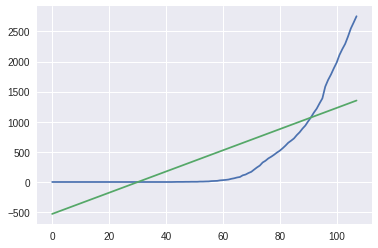

In [ ]:
plt.plot(cases_death)
plt.plot(test_linear_pred)

In [ ]:
print('Linear regression for future prediction')
print(linear_pred[-10:])

Linear regression for future prediction
[[1370.39269643]
 [1387.98790731]
 [1405.58311819]
 [1423.17832906]
 [1440.77353994]
 [1458.36875081]
 [1475.96396169]
 [1493.55917257]
 [1511.15438344]
 [1528.74959432]]
